In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

In [2]:
df = pd.read_csv("house.csv")
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [3]:
df.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [4]:
Add_to_number = {
    'Shahran': 5,'Pardis': 0,'Shahrake Qods': 2,'Shahrake Gharb': 2,'Yakhchiabad': 16,
    'North Program Organization': 0,'Andisheh': 0,'West Ferdows Boulevard': 5,
    'Narmak': 8,'Saadat Abad': 2,'Zafar': 3,'Islamshahr': 0,'Pirouzi': 13,
    'Shahrake Shahid Bagheri': 4,'Moniriyeh': 11,'Velenjak': 1,'Amirieh': 12,
    'Southern Janatabad': 5,'Salsabil': 10,'Zargandeh': 3,'Feiz Garden': 0,
    'Water Organization': 0,'ShahrAra': 2,'Gisha': 2,'Ray': 20,'Abbasabad': 7,
    'Ostad Moein': 9,'Farmanieh': 1,'Parand': 0,'Punak': 5,'Qasr-od-Dasht': 0,
    'Aqdasieh': 1,'Pakdasht': 0,'Railway': 16,'Central Janatabad': 5,
    'East Ferdows Boulevard': 5,'Pakdasht KhatunAbad': 0,'Sattarkhan': 2,
    'Baghestan': 0,'Shahryar': 0,'Northern Janatabad': 5,'Daryan No': 1,
    'Southern Program Organization': 0,'Rudhen': 0,'West Pars': 4,'Afsarieh': 15,
    'Marzdaran': 2,'Dorous': 3,'Sadeghieh': 5,'Chahardangeh':0,'Bagershahr': 20,
    'Jeyhoon': 10,'Lavizan': 4,'Shams Abad': 4,'Fatemi': 6,'Keshavarz Boulevard': 6,
    'Kahrizak': 0,'Qarchak': 0,'Northren Jamalzadeh': 6,'Azarbaijan': 10,'Bahar': 7,
    'Persian Gulf Martyrs Lake': 22,'Beryanak': 10,'Heshmatieh': 7,'Elm-o-Sanat': 4,
    'Golestan': 0,'Shahr-e-Ziba': 5,'Pasdaran': 3,'Chardivari': 0,'Gheitarieh': 1,
    'Kamranieh': 1,'Gholhak': 3,'Heravi': 4,'Hashemi': 10,'Dehkade Olampic': 22,
    'Damavand': 0,'Republic': 11,'Zaferanieh': 1,'Qazvin Imamzadeh Hassan': 17,
    'Niavaran': 1,'Valiasr': 6,'Qalandari': 0,'Amir Bahador': 11,'Ekhtiarieh': 3,
    'Ekbatan': 5,'Absard': 0,'Haft Tir': 6,'Mahallati': 1,'Ozgol': 1,'Tajrish': 1,
    'Abazar': 5,'Koohsar': 5,'Hekmat': 1,'Parastar': 0,'Lavasan': 0,'Majidieh': 4,
    'Southern Chitgar': 22,'Karimkhan': 6,'Si Metri Ji': 10,'Karoon': 10,
    'Northern Chitgar': 22,'East Pars': 4,'Kook': 0,'Air force': 13,'Sohanak': 1,
    'Komeil': 10,'Azadshahr': 5,'Zibadasht': 0,'Amirabad': 6,'Dezashib': 1,'Elahieh': 1,
    'Mirdamad': 3,'Razi': 11,'Jordan': 3,'Mahmoudieh': 1,'Shahedshahr': 0,'Yaftabad': 17,
    'Mehran': 0,'Nasim Shahr': 0,'Tenant': 0,'Chardangeh': 0,'Fallah': 17,'Eskandari': 10,
    'Shahrakeh Naft': 1,'Ajudaniye': 1,'Tehransar': 21,'Nawab': 10,'Yousef Abad': 6,
    'Northern Suhrawardi': 7,'Villa': 6,'Hakimiyeh': 4,'Nezamabad': 14,'Garden of Saba': 6,
    'Tarasht': 2,'Azari': 17,'Shahrake Apadana': 5,'Araj': 4,'Vahidieh': 14,'Malard': 0,
    'Shahrake Azadi': 5,'Darband': 1,'Vanak': 3,'Tehran Now': 13,'Darabad': 1,'Eram': 18,
    'Atabak': 15,'Sabalan': 7,'SabaShahr': 0,'Shahrake Madaen': 15,'Waterfall': 0,'Ahang': 14,
    'Salehabad': 19,'Pishva': 0,'Enghelab': 11,'Islamshahr Elahieh': 0,'Ray - Montazeri': 20,
    'Firoozkooh Kuhsar': 0,'Ghoba': 3,'Mehrabad': 9,'Southern Suhrawardi': 7,'Abuzar': 17,
    'Dolatabad': 20,'Hor Square': 10,'Taslihat': 0,'Kazemabad': 0,'Robat Karim': 0,
    'Ray - Pilgosh': 20,'Ghiyamdasht': 0,'Telecommunication': 0,'Mirza Shirazi': 6,'Gandhi': 3,
    'Argentina': 6,'Seyed Khandan': 7,'Shahrake Quds': 22,'Safadasht': 0,'Khademabad Garden': 0,
    'Hassan Abad': 11,'Chidz': 1,'Khavaran': 15,'Boloorsazi': 0,'Mehrabad River River': 0,
    'Varamin - Beheshti': 0,'Shoosh': 15,'Thirteen November': 0,'Darakeh': 1,'Aliabad South': 16,
    'Alborz Complex': 0,'Firoozkooh': 0,'Vahidiyeh': 0,'Shadabad': 18,'Naziabad': 16,'Javadiyeh': 16,
}
dfc = df.dropna()
dfc['Address'] = dfc['Address'].map(Add_to_number)
dfc = dfc.replace({True:1, False:0})
dfc['Area'] = dfc['Area'].str.strip().str.replace(',', '').astype(float)
dfc

/var/folders/h7/k41ml98x2vzclpq5z9m3ptb00000gn/T/ipykernel_2074/1770781485.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['Address'] = dfc['Address'].map(Add_to_number)
/var/folders/h7/k41ml98x2vzclpq5z9m3ptb00000gn/T/ipykernel_2074/1770781485.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfc = dfc.replace({True:1, False:0})


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,1,1,5.0,1.850000e+09,61666.67
1,60.0,1,1,1,1,5.0,1.850000e+09,61666.67
2,79.0,2,1,1,1,0.0,5.500000e+08,18333.33
3,95.0,2,1,1,1,2.0,9.025000e+08,30083.33
4,123.0,2,1,1,1,2.0,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86.0,2,1,1,1,5.0,3.500000e+09,116666.67
3475,83.0,2,1,1,1,1.0,6.800000e+09,226666.67
3476,75.0,2,0,0,0,0.0,3.650000e+08,12166.67
3477,105.0,2,1,1,1,3.0,5.600000e+09,186666.67


In [5]:
numeric_cols =['Area','Room', 'Parking', 'Warehouse', 'Elevator', 'Price', 'Price(USD)']
scaler = StandardScaler()
dfc[numeric_cols] = scaler.fit_transform(dfc[numeric_cols])
dfc

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,-0.027703,-1.423499,0.424176,0.304925,0.519732,5.0,-0.434694,-0.434694
1,-0.027703,-1.423499,0.424176,0.304925,0.519732,5.0,-0.434694,-0.434694
2,-0.027703,-0.107039,0.424176,0.304925,0.519732,0.0,-0.594782,-0.594782
3,-0.027703,-0.107039,0.424176,0.304925,0.519732,2.0,-0.551373,-0.551373
4,-0.027703,-0.107039,0.424176,0.304925,0.519732,2.0,0.199499,0.199499
...,...,...,...,...,...,...,...,...
3474,-0.027703,-0.107039,0.424176,0.304925,0.519732,5.0,-0.231506,-0.231506
3475,-0.027703,-0.107039,0.424176,0.304925,0.519732,1.0,0.174870,0.174870
3476,-0.027703,-0.107039,-2.357515,-3.279497,-1.924069,0.0,-0.617563,-0.617563
3477,-0.027703,-0.107039,0.424176,0.304925,0.519732,3.0,0.027097,0.027097


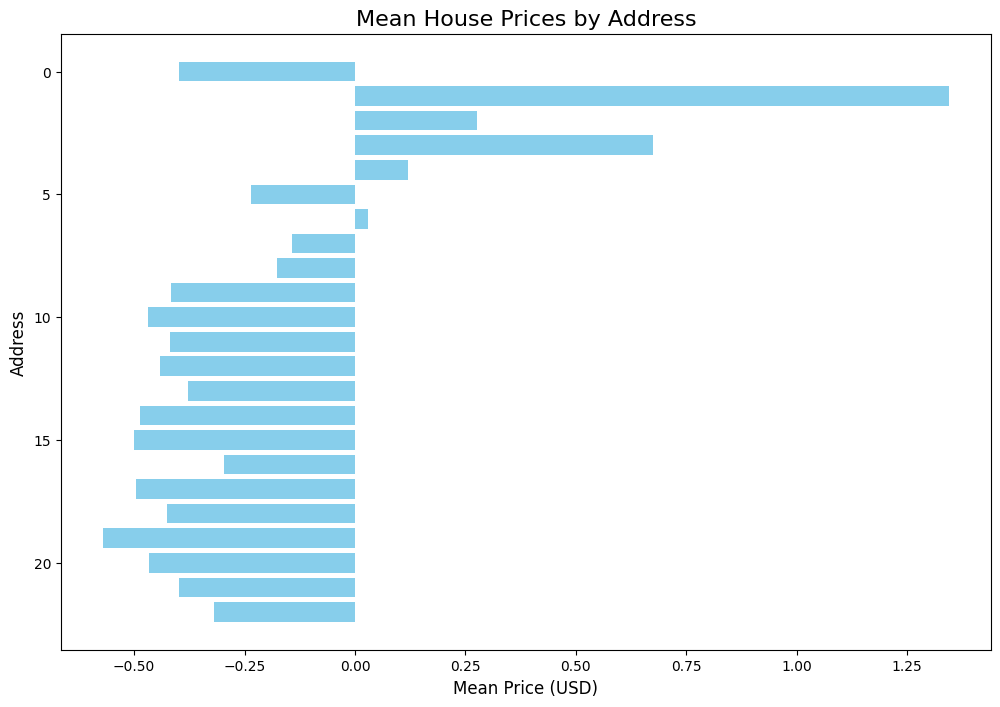

In [6]:
mean_prices = dfc.groupby('Address')['Price(USD)'].mean().reset_index()
mean_prices_sorted = mean_prices.sort_values(by='Price(USD)', ascending=False)
mean_prices = dfc.groupby('Address')['Price(USD)'].mean().reset_index()
mean_prices_sorted = mean_prices.sort_values(by='Price(USD)', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(mean_prices_sorted['Address'], mean_prices_sorted['Price(USD)'], color='skyblue')
plt.xlabel('Mean Price (USD)', fontsize=12)
plt.ylabel('Address', fontsize=12)
plt.title('Mean House Prices by Address', fontsize=16)
plt.gca().invert_yaxis()

plt.show()

In [7]:
dfc['Address'] = 1
x = dfc[["Area", "Room", "Parking", "Warehouse", "Elevator"]]
y = dfc["Price(USD)"]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Model Coefficients:", model.coef_)

print('Area:' '0.01183798', "Room:"'0.54133682', "Parking:"'0.02231265', "Warehouse:"'0.02234075', "Elevator:"'0.00652024')

Mean Squared Error: 0.7960729628834257
Model Coefficients: [0.01183798 0.54133682 0.02231265 0.02234075 0.00652024]
Area:0.01183798 Room:0.54133682 Parking:0.02231265 Warehouse:0.02234075 Elevator:0.00652024


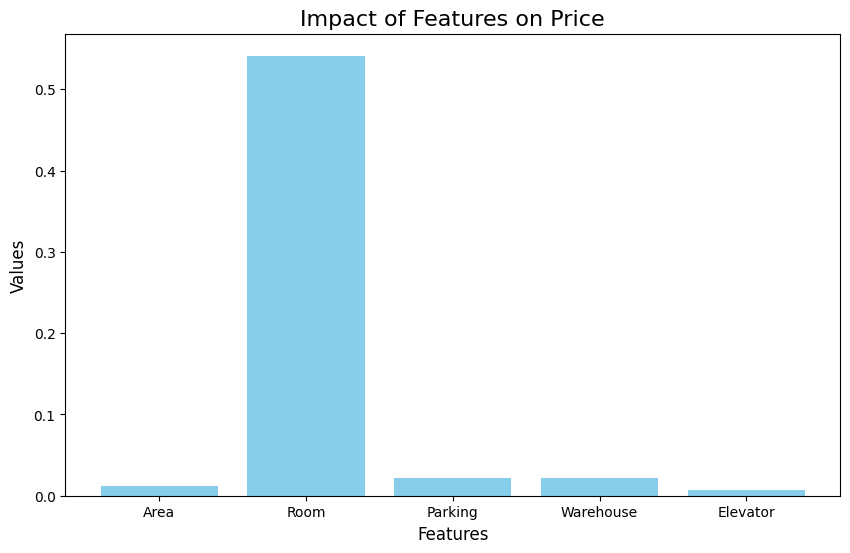

In [8]:
features = ['Area', 'Room', 'Parking','Warehouse','Elevator']
values = [0.01183798,0.54133682 ,0.02231265 ,0.02234075 ,0.00652024]

plt.figure(figsize=(10, 6))
plt.bar(features, values, color='skyblue')

plt.title('Impact of Features on Price', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Values', fontsize=12)

plt.show()